In [361]:
import pandas as pd 
import sklearn as skl
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [309]:
df = pd.read_csv("./acc_intake_outcome.csv")
df.head()

,index_id_intake,animal_id_intake,datetime_intake,monthyear_intake,found_location,intake_type,intake_condition,animal_type_intake,sex_upon_intake,age_upon_intake,...,color_outcome,Age_Upon_Outcome(days),outcome_month,outcome_year,outcome_weekday,outcome_hour,Age_Upon_Outcome(years),age_range_outcome,outcome_frequency,order_of_outcome
0,70641,A178569,2014-03-17 09:45:00,Mar-14,Austin (TX),Public Assist,Normal,Dog,Neutered Male,15 years,...,White/Black,5485,3,2014,Sunday,15,15.03,"(15.0, 17.5]",1,1
1,47828,A189592,2015-09-18 17:46:00,Sep-15,Chesney And Slaughter in Austin (TX),Stray,Normal,Dog,Spayed Female,18 years,...,Brown/White,6622,9,2015,Friday,19,18.14,"(17.5, 20.0]",1,1
2,64036,A215368,2014-08-04 13:51:00,Aug-14,Clay/Ulrich in Austin (TX),Stray,Normal,Dog,Neutered Male,13 years,...,Black,4947,8,2014,Monday,16,13.55,"(12.5, 15.0]",1,1
3,44677,A254503,2014-11-09 11:04:00,Nov-14,8603 Fathom Cir in Austin (TX),Stray,Normal,Dog,Spayed Female,17 years,...,Tan,6399,11,2014,Thursday,11,17.53,"(17.5, 20.0]",1,1
4,107124,A261770,2014-11-07 13:40:00,Nov-14,Del Valle (TX),Euthanasia Request,Normal,Cat,Neutered Male,20 years,...,White,7305,11,2014,Friday,15,20.01,"(20.0, 22.5]",1,1


In [310]:
df_ML = df.copy()
df_ML.columns


Index(['index_id_intake', 'animal_id_intake', 'datetime_intake',
       'monthyear_intake', 'found_location', 'intake_type', 'intake_condition',
       'animal_type_intake', 'sex_upon_intake', 'age_upon_intake',
       'breed_intake', 'color_intake', 'Age_Upon_Intake(days)',
       'Age_Upon_Intake(years)', 'age_range_intake', 'intake_month',
       'intake_year', 'intake_weekday', 'intake_hour', 'intake_frequency',
       'order_of_intake', 'index_id_outcome', 'animal_id_outcome',
       'datetime_outcome', 'monthyear_outcome', 'date_of_birth_outcome',
       'outcome_type', 'outcome_subtype', 'animal_type_outcome',
       'sex_upon_outcome', 'age_upon_outcome', 'breed_outcome',
       'color_outcome', 'Age_Upon_Outcome(days)', 'outcome_month',
       'outcome_year', 'outcome_weekday', 'outcome_hour',
       'Age_Upon_Outcome(years)', 'age_range_outcome', 'outcome_frequency',
       'order_of_outcome'],
      dtype='object')

# Keep following columns  age ,  breed , color , intake type,intake condition & outcome type

In [311]:
df_ML= df.drop(['index_id_intake','animal_id_intake','age_range_intake', 'breed_outcome','datetime_intake',
                'monthyear_intake', 'found_location','sex_upon_intake','intake_month','intake_year','age_upon_intake', 
                'intake_weekday', 'intake_hour', 'intake_frequency','order_of_intake','index_id_outcome',
                'animal_id_outcome','datetime_outcome', 'monthyear_outcome', 'date_of_birth_outcome', 'outcome_subtype', 'animal_type_outcome','sex_upon_outcome',  'outcome_month',
                'outcome_year', 'outcome_weekday', 'outcome_hour','outcome_frequency','order_of_outcome',
               'Age_Upon_Intake(years)', 'age_upon_outcome','Age_Upon_Outcome(years)', 'age_range_outcome','color_outcome'],axis=1)

In [312]:
df_ML.head(2)

,intake_type,intake_condition,animal_type_intake,breed_intake,color_intake,Age_Upon_Intake(days),outcome_type,Age_Upon_Outcome(days)
0,Public Assist,Normal,Dog,Shetland Sheepdog Mix,White/Black,5475,Return to Owner,5485
1,Stray,Normal,Dog,Shetland Sheepdog Mix,Brown/White,6570,Return to Owner,6622


In [313]:
df_ML.intake_condition.unique()

array(['Normal', 'Sick', 'Aged', 'Medical', 'Injured', 'Nursing', 'Other',
       'Feral', 'Pregnant', 'Behavior', 'Neonatal', 'Space', 'Med Attn',
       'Neurologic', 'Panleuk', 'Med Urgent', 'Agonal'], dtype=object)

### Checking for the unique values of the all the categories that we choose for ML.

In [314]:
col = ['intake_type','intake_condition','animal_type_intake','breed_intake','color_intake','outcome_type']

for col in df_ML[col]:
    print(col,df_ML[col].nunique())


intake_type 5
intake_condition 17
animal_type_intake 5
breed_intake 2749
color_intake 616
outcome_type 11


In [315]:
df_ML['intake_condition'].unique()

array(['Normal', 'Sick', 'Aged', 'Medical', 'Injured', 'Nursing', 'Other',
       'Feral', 'Pregnant', 'Behavior', 'Neonatal', 'Space', 'Med Attn',
       'Neurologic', 'Panleuk', 'Med Urgent', 'Agonal'], dtype=object)

### Hot encoding color_intake to 10 categories and other  (616 in total)

In [316]:
# finding the count of all categories in color_intake
color_intake_counts = df_ML.color_intake.value_counts()
color_intake_counts

Black/White                14567
Black                      11559
Brown Tabby                 8268
White                       5015
Brown/White                 4693
                           ...  
Tortie/Gold                    1
Orange Tabby/Black             1
Blue Tabby/Orange              1
Cream Tabby/Cream Tabby        1
White/Tortie Point             1
Name: color_intake, Length: 616, dtype: int64

<AxesSubplot:ylabel='Density'>

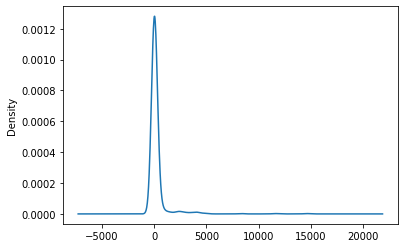

In [317]:
color_intake_counts.plot.density()

In [318]:
# Determine which values to replace
replace_color_intake = list(color_intake_counts[color_intake_counts < 3892].index)

# Replace in DataFrame
for color in replace_color_intake:
    df_ML.color_intake = df_ML.color_intake.replace(color,"Other")


# Check to make sure binning was successful
df_ML.color_intake.value_counts()


Other                72791
Black/White          14567
Black                11559
Brown Tabby           8268
White                 5015
Brown/White           4693
Brown Tabby/White     4259
Tan/White             4228
Orange Tabby          4025
White/Black           3972
Blue/White            3892
Name: color_intake, dtype: int64

In [319]:
enc_color = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_color = pd.DataFrame(enc_color.fit_transform(df_ML.color_intake.values.reshape(-1,1)))
#print(encode_df)
# Rename encoded columns
encode_df_color.columns = enc_color.get_feature_names_out(['color_intake'])
encode_df_color.head()

,color_intake_Black,color_intake_Black/White,color_intake_Blue/White,color_intake_Brown Tabby,color_intake_Brown Tabby/White,color_intake_Brown/White,color_intake_Orange Tabby,color_intake_Other,color_intake_Tan/White,color_intake_White,color_intake_White/Black
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [320]:
df_ML=df_ML.merge(encode_df_color,left_index=True,right_index=True).drop("color_intake",1)


/var/folders/3m/mj278b89297553km9_g94ghr0000gn/T/ipykernel_14268/2328822473.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_ML=df_ML.merge(encode_df_color,left_index=True,right_index=True).drop("color_intake",1)


### Hot encoding breed_intake to 10 categories and other (2749 in total)

In [321]:
breed_intake_counts = df_ML.breed_intake.value_counts()
breed_intake_counts


Domestic Shorthair Mix                                   32671
Domestic Shorthair                                       12070
Pit Bull Mix                                              9085
Labrador Retriever Mix                                    7642
Chihuahua Shorthair Mix                                   6584
                                                         ...  
American Pit Bull Terrier/Black Mouth Cur                    1
Shih Tzu/Dachshund Longhair                                  1
Siberian Husky/Golden Retriever                              1
Pit Bull/Australian Kelpie                                   1
Labrador Retriever/Nova Scotia Duck Tolling Retriever        1
Name: breed_intake, Length: 2749, dtype: int64

<AxesSubplot:ylabel='Density'>

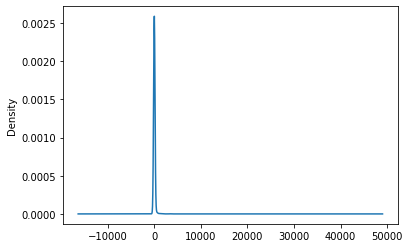

In [322]:
breed_intake_counts.plot.density()

In [323]:
# Determine which values to replace
replace_breed_intake = list(breed_intake_counts[breed_intake_counts < 1632].index)
replace_breed_intake
# # Replace in DataFrame
for breed in replace_breed_intake:
    df_ML.breed_intake = df_ML.breed_intake.replace(breed,"Other")



# # # Check to make sure binning was successful
df_ML.breed_intake.value_counts()


Other                        56945
Domestic Shorthair Mix       32671
Domestic Shorthair           12070
Pit Bull Mix                  9085
Labrador Retriever Mix        7642
Chihuahua Shorthair Mix       6584
German Shepherd Mix           3493
Domestic Medium Hair Mix      3264
Pit Bull                      2140
Australian Cattle Dog Mix     1743
Domestic Longhair Mix         1632
Name: breed_intake, dtype: int64

In [324]:
enc_breed = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_breed = pd.DataFrame(enc_breed.fit_transform(df_ML.breed_intake.values.reshape(-1,1)))
#print(encode_df)
# Rename encoded columns
encode_df_breed.columns = enc_breed.get_feature_names_out(['breed_intake'])
encode_df_breed.head()

,breed_intake_Australian Cattle Dog Mix,breed_intake_Chihuahua Shorthair Mix,breed_intake_Domestic Longhair Mix,breed_intake_Domestic Medium Hair Mix,breed_intake_Domestic Shorthair,breed_intake_Domestic Shorthair Mix,breed_intake_German Shepherd Mix,breed_intake_Labrador Retriever Mix,breed_intake_Other,breed_intake_Pit Bull,breed_intake_Pit Bull Mix
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [325]:
df_ML=df_ML.merge(encode_df_breed,left_index=True,right_index=True).drop("breed_intake",1)


/var/folders/3m/mj278b89297553km9_g94ghr0000gn/T/ipykernel_14268/2773796391.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_ML=df_ML.merge(encode_df_breed,left_index=True,right_index=True).drop("breed_intake",1)


In [326]:
df_ML.head(2)

,intake_type,intake_condition,animal_type_intake,Age_Upon_Intake(days),outcome_type,Age_Upon_Outcome(days),color_intake_Black,color_intake_Black/White,color_intake_Blue/White,color_intake_Brown Tabby,...,breed_intake_Chihuahua Shorthair Mix,breed_intake_Domestic Longhair Mix,breed_intake_Domestic Medium Hair Mix,breed_intake_Domestic Shorthair,breed_intake_Domestic Shorthair Mix,breed_intake_German Shepherd Mix,breed_intake_Labrador Retriever Mix,breed_intake_Other,breed_intake_Pit Bull,breed_intake_Pit Bull Mix
0,Public Assist,Normal,Dog,5475,Return to Owner,5485,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Stray,Normal,Dog,6570,Return to Owner,6622,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Hot encoding intake_condition to 10 categories and other (17 in total)

In [327]:
df_ML.intake_condition.nunique()

17

In [328]:
# finding the count of all categories in color_intake
intake_condition_count = df_ML.intake_condition.value_counts()
intake_condition_count

Normal        119905
Injured         7114
Sick            4665
Nursing         3875
Neonatal         469
Aged             467
Other            289
Medical          189
Feral            124
Pregnant         110
Behavior          50
Space              4
Med Attn           3
Med Urgent         2
Neurologic         1
Panleuk            1
Agonal             1
Name: intake_condition, dtype: int64

<AxesSubplot:ylabel='Density'>

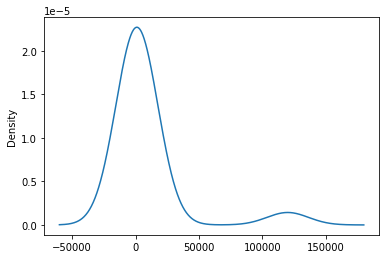

In [329]:
intake_condition_count.plot.density()

In [330]:
# Determine which values to replace
replace_intake_condition = list(intake_condition_count[intake_condition_count < 465].index)

# Replace in DataFrame
for condition in replace_intake_condition:
    df_ML.intake_condition = df_ML.intake_condition.replace(condition,"Other")


# Check to make sure binning was successful
df_ML.intake_condition.value_counts()

Normal      119905
Injured       7114
Sick          4665
Nursing       3875
Other          774
Neonatal       469
Aged           467
Name: intake_condition, dtype: int64

In [331]:
enc_condition = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_condition = pd.DataFrame(enc_condition.fit_transform(df_ML.intake_condition.values.reshape(-1,1)))
#print(encode_df)
# Rename encoded columns
encode_df_condition.columns = enc_condition.get_feature_names_out(['intake_condition'])
encode_df_condition.head()

,intake_condition_Aged,intake_condition_Injured,intake_condition_Neonatal,intake_condition_Normal,intake_condition_Nursing,intake_condition_Other,intake_condition_Sick
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [332]:
df_ML=df_ML.merge(encode_df_condition,left_index=True,right_index=True).drop("intake_condition",1)


/var/folders/3m/mj278b89297553km9_g94ghr0000gn/T/ipykernel_14268/1221785804.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_ML=df_ML.merge(encode_df_condition,left_index=True,right_index=True).drop("intake_condition",1)


In [333]:
df_ML.head(2)

,intake_type,animal_type_intake,Age_Upon_Intake(days),outcome_type,Age_Upon_Outcome(days),color_intake_Black,color_intake_Black/White,color_intake_Blue/White,color_intake_Brown Tabby,color_intake_Brown Tabby/White,...,breed_intake_Other,breed_intake_Pit Bull,breed_intake_Pit Bull Mix,intake_condition_Aged,intake_condition_Injured,intake_condition_Neonatal,intake_condition_Normal,intake_condition_Nursing,intake_condition_Other,intake_condition_Sick
0,Public Assist,Dog,5475,Return to Owner,5485,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Stray,Dog,6570,Return to Owner,6622,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Hot encoding intake_type to 0 and 1 for 5 categories

In [334]:
df_ML.intake_type.nunique()

5

In [335]:
# finding the count of all categories in color_intake
intake_type_count = df_ML.intake_type.value_counts()
intake_type_count

Stray                 98067
Owner Surrender       29505
Public Assist          8588
Abandoned               850
Euthanasia Request      259
Name: intake_type, dtype: int64

<AxesSubplot:ylabel='Density'>

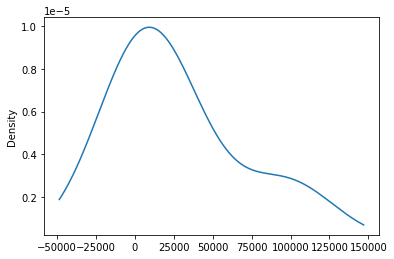

In [336]:
intake_type_count.plot.density()

In [337]:
# # Determine which values to replace
# replace_intake_condition = list(intake_type[intake_type < 465].index)

# # Replace in DataFrame
# for condition in replace_intake_condition:
#     df_ML.intake_condition = df_ML.intake_condition.replace(condition,"Other")


# # Check to make sure binning was successful
# df_ML.intake_condition.value_counts()

In [338]:
enc_intake_type = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_intake_type = pd.DataFrame(enc_intake_type.fit_transform(df_ML.intake_type.values.reshape(-1,1)))
#print(encode_df)
# Rename encoded columns
encode_df_intake_type.columns = enc_intake_type.get_feature_names_out(['intake_type'])
encode_df_intake_type.head()

,intake_type_Abandoned,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0


In [339]:
df_ML=df_ML.merge(encode_df_intake_type,left_index=True,right_index=True).drop("intake_type",1)


/var/folders/3m/mj278b89297553km9_g94ghr0000gn/T/ipykernel_14268/4083467400.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_ML=df_ML.merge(encode_df_intake_type,left_index=True,right_index=True).drop("intake_type",1)


In [340]:
df_ML.head(2)

,animal_type_intake,Age_Upon_Intake(days),outcome_type,Age_Upon_Outcome(days),color_intake_Black,color_intake_Black/White,color_intake_Blue/White,color_intake_Brown Tabby,color_intake_Brown Tabby/White,color_intake_Brown/White,...,intake_condition_Neonatal,intake_condition_Normal,intake_condition_Nursing,intake_condition_Other,intake_condition_Sick,intake_type_Abandoned,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray
0,Dog,5475,Return to Owner,5485,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Dog,6570,Return to Owner,6622,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Hot encoding animal_type_intake to 0 and 1 for 5 categories 

In [341]:
df_ML.animal_type_intake.nunique()

5

In [342]:
# finding the count of all categories in color_intake
animal_intake_type_count = df_ML.animal_type_intake.value_counts()
animal_intake_type_count

Dog          80114
Cat          54372
Other         2188
Bird           571
Livestock       24
Name: animal_type_intake, dtype: int64

<AxesSubplot:ylabel='Density'>

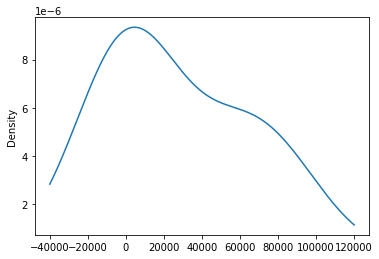

In [343]:
animal_intake_type_count.plot.density()

In [344]:
# # Determine which values to replace
# replace_intake_condition = list(intake_type[intake_type < 465].index)

# # Replace in DataFrame
# for condition in replace_intake_condition:
#     df_ML.intake_condition = df_ML.intake_condition.replace(condition,"Other")


# # Check to make sure binning was successful
# df_ML.intake_condition.value_counts()

In [345]:
enc_animal_intake_type = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_animal_intake_type = pd.DataFrame(enc_animal_intake_type.fit_transform(df_ML.animal_type_intake.values.reshape(-1,1)))
#print(encode_df)
# Rename encoded columns
encode_df_animal_intake_type.columns = enc_animal_intake_type.get_feature_names_out(['animal_type_intake'])
encode_df_animal_intake_type.head()

,animal_type_intake_Bird,animal_type_intake_Cat,animal_type_intake_Dog,animal_type_intake_Livestock,animal_type_intake_Other
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [346]:
df_ML=df_ML.merge(encode_df_intake_type,left_index=True,right_index=True).drop("animal_type_intake",1)


/var/folders/3m/mj278b89297553km9_g94ghr0000gn/T/ipykernel_14268/2733093773.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_ML=df_ML.merge(encode_df_intake_type,left_index=True,right_index=True).drop("animal_type_intake",1)


In [347]:
df_ML.head(2)

,Age_Upon_Intake(days),outcome_type,Age_Upon_Outcome(days),color_intake_Black,color_intake_Black/White,color_intake_Blue/White,color_intake_Brown Tabby,color_intake_Brown Tabby/White,color_intake_Brown/White,color_intake_Orange Tabby,...,intake_type_Abandoned_x,intake_type_Euthanasia Request_x,intake_type_Owner Surrender_x,intake_type_Public Assist_x,intake_type_Stray_x,intake_type_Abandoned_y,intake_type_Euthanasia Request_y,intake_type_Owner Surrender_y,intake_type_Public Assist_y,intake_type_Stray_y
0,5475,Return to Owner,5485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6570,Return to Owner,6622,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Hot encoding outcome_type  to 0 and 1 for categories

In [348]:
df_ML['outcome_type'].unique()

array(['Return to Owner', 'Euthanasia', 'Adoption', 'Transfer',
       'Rto-Adopt', 'Died', 'Missing', 'Disposal', nan, 'Relocate',
       'Lost', 'Stolen'], dtype=object)

In [349]:
# finding the count of all categories in color_intake
outcome_type_count = df_ML.outcome_type.value_counts()
outcome_type_count

Adoption           65581
Transfer           41394
Return to Owner    23352
Euthanasia          4496
Died                1195
Rto-Adopt            924
Disposal             226
Missing               69
Relocate              11
Stolen                 2
Lost                   1
Name: outcome_type, dtype: int64

<AxesSubplot:ylabel='Density'>

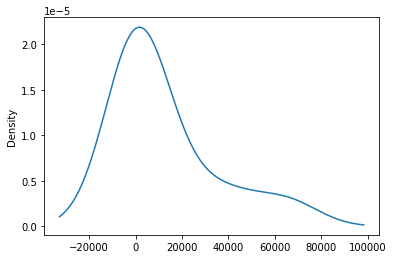

In [350]:
outcome_type_count.plot.density()

### Categorizing output into Adopted( 'Adoption','Return to Owner','Rto-Adopt') & Other

In [351]:
# # Determine which values to replace
# replace_intake_condition = list(intake_type[intake_type < 465].index)

other_outcome_type_list = ['Transfer','Euthanasia','Died','Disposal','Missing','Relocate','Stolen','Lost']
adoption_list = ['Adoption','Return to Owner','Rto-Adopt']
             

# # Replace in DataFrame
for outcome in other_outcome_type_list:
    df_ML.outcome_type = df_ML.outcome_type.replace(outcome,"Other")
    
for outcome in adoption_list:
    df_ML.outcome_type = df_ML.outcome_type.replace(outcome,"Adopted")


# # Check to make sure binning was successful
df_ML.outcome_type.value_counts()

Adopted    89857
Other      47394
Name: outcome_type, dtype: int64

In [352]:
adopted_dummies = pd.get_dummies(df_ML["outcome_type"])
adopted_dummies

,Adopted,Other
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
137264,1,0
137265,1,0
137266,1,0
137267,0,1


In [353]:
df_ML=df_ML.merge(adopted_dummies,left_index=True,right_index=True).drop("outcome_type",1)


/var/folders/3m/mj278b89297553km9_g94ghr0000gn/T/ipykernel_14268/4048757389.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_ML=df_ML.merge(adopted_dummies,left_index=True,right_index=True).drop("outcome_type",1)


In [356]:
df_ML.head()

,Age_Upon_Intake(days),Age_Upon_Outcome(days),color_intake_Black,color_intake_Black/White,color_intake_Blue/White,color_intake_Brown Tabby,color_intake_Brown Tabby/White,color_intake_Brown/White,color_intake_Orange Tabby,color_intake_Other,...,intake_type_Owner Surrender_x,intake_type_Public Assist_x,intake_type_Stray_x,intake_type_Abandoned_y,intake_type_Euthanasia Request_y,intake_type_Owner Surrender_y,intake_type_Public Assist_y,intake_type_Stray_y,Adopted,Other
0,5475,5485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
1,6570,6622,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0
2,4745,4947,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0
3,6205,6399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1
4,7300,7305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1


In [362]:
# Remove diabetes outcome target from features data
y = df_ML.Adopted
columns=["Adopted","Other"]
X = df_ML.drop(columns=columns)


# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [370]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [371]:

model = LogisticRegression()

In [372]:
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [373]:
model.predict(X_test_scaled)

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [374]:
y_test

100117    1
44475     1
47746     1
35050     1
73452     1
         ..
102629    0
111634    1
63438     0
8464      1
56653     1
Name: Adopted, Length: 34318, dtype: uint8

In [375]:
model.score(X_test,y_test)

/Users/pappus/opt/anaconda3/envs/new_mlenv/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.6541465120345008

In [377]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(X_train_scaled,y_train)
y_pred=random.predict(X_test_scaled)

print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.757
